<a href="https://colab.research.google.com/github/ayushi15092002/mental-health-workload/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
!pip install sklearn

In [ ]:
!pip install sklearn.cross_validation

In [4]:
import pandas as pd
import numpy as np
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils.multiclass import unique_labels

from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
n=8
#1-KNN
from sklearn.neighbors import KNeighborsClassifier
#2-RandomForest
from sklearn.ensemble import RandomForestClassifier
#3-SVM
from sklearn import datasets, svm
#4-DecisionTree
from sklearn import tree
#5-LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#6-GaussianNB
from sklearn.naive_bayes import GaussianNB
#7-MLP
from sklearn.neural_network import MLPClassifier

In [16]:
# df = pd.concat(
#     map(pd.read_csv,
#         [r'/content/drive/My Drive/drdo/spectral_analysis/features0.xlsx',
#          r'/content/drive/My Drive/drdo/spectral_analysis/features2.xlsx',
#          r'/content/drive/My Drive/drdo/spectral_analysis/features3.xlsx'
#         ]))
df = pd.DataFrame()
data0 = pd.read_excel(r'/content/drive/My Drive/drdo/spectral_analysis/features0.xlsx')
df = df.append(data0)
data2 = pd.read_excel(r'/content/drive/My Drive/drdo/spectral_analysis/features2.xlsx')
df = df.append(data2, ignore_index=True)
data3 = pd.read_excel(r'/content/drive/My Drive/drdo/spectral_analysis/features3.xlsx')
df = df.append(data3, ignore_index=True)
 



In [ ]:
 df.shape

In [ ]:
# r = pd.read_excel(r'/content/drive/My Drive/drdo/spectral_analysis/features0.xlsx')
r = df
# print('r ',r)
lines = r.values.tolist()
print("lines[0] ", lines[0])
lines.pop(0)  # remove first row
# print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
# print(lines ])
# lines = [l for l in r]
# print('lines ',lines)
for i in range(1,len(lines[1])-1):  
    columns = []
    for j in range(1,len(lines)):
        print("i j ", i, j)
        print("lines[j][i]  ",j , i, lines[j][i])
        columns.append(float(lines[j][i]))
    mean = np.mean(columns,axis = 0)
    #print('\nMean = ',mean)
    std_dev  = np.std(columns,axis = 0)
    #print('\nSTD Deviation = ',std_dev)
    for j in range(1,len(lines)):
        lines[j][i] = (float(lines[j][i])-mean)/std_dev

df=pd.DataFrame(lines)
df.to_csv(r'/content/drive/My Drive/drdo/spectral_analysis/norm_features.xlsx',index=False)

# writer = csv.writer(open('Features/Normalizedfeatures.csv', 'wb'))
# writer.writerows(lines)
print('Done!')

In [ ]:
# f = open('/content/drive/My Drive/drdo/spectral_analysis/norm_features.csv')
f = pd.read_excel(r'/content/drive/My Drive/drdo/spectral_analysis/norm_features.xlsx')
# attributes=f.readline()
# print("attributes ", attributes)
f = f.values.tolist()
attributes = f[0]
# print("lines[0] ", lines[0])
f.pop(0)  # remove first row
X = []
y = []
for line in f:
    # line = line.rstrip().split(',')
    # print("line ", line)
    l = [float(i) for i in line]
    X.append(l[:-1])
    y.append(l[-1])
    
X = np.asarray(X)
y = np.asarray(y)
np.count_nonzero(np.isnan(X))
X=np.nan_to_num(X)
np.count_nonzero(np.isnan(X))
X=np.array(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

1130

In [ ]:
from sklearn import preprocessing
standard_scaler_object = preprocessing.StandardScaler()
standard_scaler_object.fit(X)
x=standard_scaler_object.transform(X)
x.std(axis=0)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(423, 264) (423,)
(142, 264) (142,)


In [ ]:
print (x_train.shape, x_test.shape)

(423, 264) (142, 264)


In [ ]:
print (y_train.shape, y_test.shape)

(423,) (142,)


#1-KNN
0.5211267605633803
Time taken  0.0196230411529541


array([2, 3, 1, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 1,
       2, 2, 3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 3, 2, 1, 1, 2, 3, 1, 3, 2,
       1, 1, 1, 2, 2, 3, 2, 1, 3, 3, 3, 1, 1, 3, 2, 3, 2, 1, 2, 2, 1, 3,
       3, 3, 3, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 1, 3, 1, 2, 3, 1,
       3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1,
       2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 2, 3, 1, 2, 3, 1,
       3, 3, 1, 3, 3, 3, 2, 1, 3, 3])

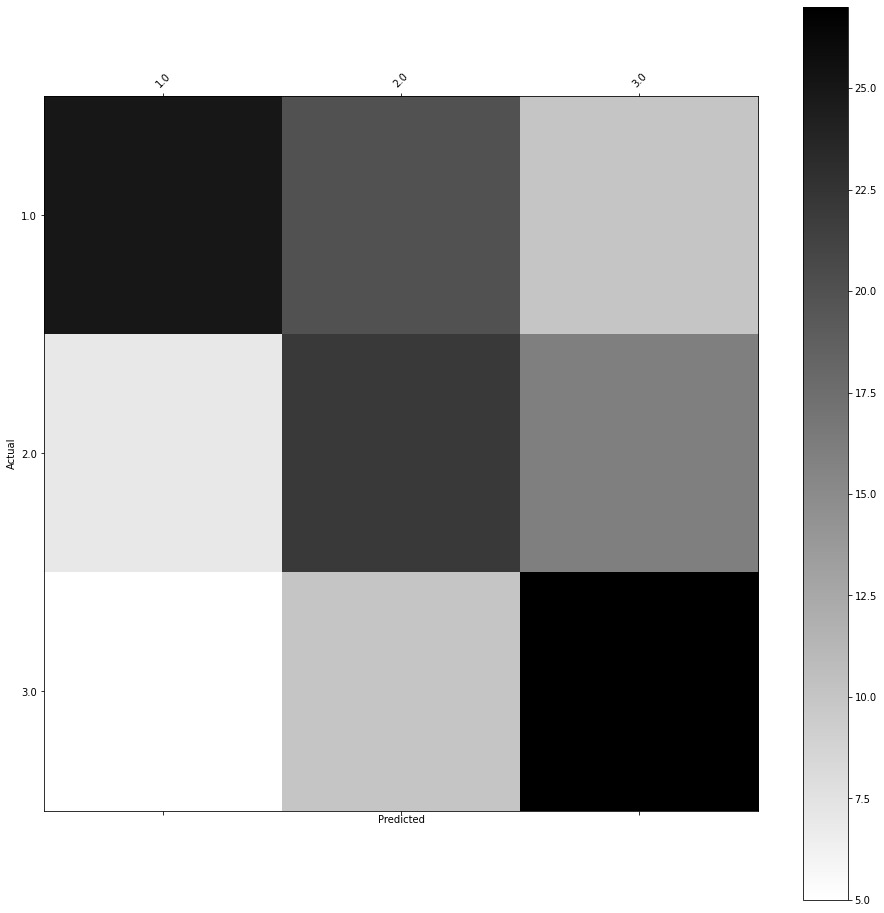

In [ ]:
 #1-KNN
print('#1-KNN')
import time
start = time.time()

model = neighbors.KNeighborsClassifier(n_neighbors = 20)
# model.fit(X_train, y_train)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
# y_pred = model.predict(X)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))

end = time.time()
print("Time taken ", end - start)
# print (confusion_matrix(y, y_pred))

#plotting confusion matrix
df_confusion = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

np.set_printoptions(precision=2)
class_names = np.array([0, 1, 2])
class_names.astype(int)

y_test.astype(int)
y_test_pred.astype(int)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_test_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# # plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
# #                       title='Normalized confusion matrix')

# plt.show()


[0.0000000e+00 3.4278743e-03 4.3267887e-03 2.8425651e-03 2.9437260e-03
 9.7921779e-03 4.9995859e-03 5.3964979e-03 0.0000000e+00 4.7113746e-03
 4.1983314e-03 2.6646892e-03 2.2207641e-03 1.9646292e-03 1.9783673e-03
 5.0395420e-03 6.7515164e-03 2.0702993e-03 3.4205073e-03 6.6679819e-03
 1.0829931e-02 0.0000000e+00 5.0607468e-03 0.0000000e+00 2.8298579e-03
 5.8702677e-03 0.0000000e+00 1.2356852e-02 0.0000000e+00 3.8784635e-03
 0.0000000e+00 5.4089832e-03 9.0544876e-03 6.1221616e-03 0.0000000e+00
 4.7331396e-03 3.0264079e-03 3.9086617e-03 1.1994048e-05 3.0725512e-03
 3.1835178e-03 4.7668600e-03 0.0000000e+00 6.1674961e-03 2.1599496e-03
 6.1427429e-03 0.0000000e+00 2.3205436e-03 1.1375111e-03 4.2785672e-03
 0.0000000e+00 3.8051065e-03 0.0000000e+00 5.7745380e-03 5.5173850e-03
 3.8843015e-03 2.5833729e-03 3.4671489e-03 0.0000000e+00 2.4162887e-03
 1.1190426e-02 3.3007530e-03 6.0733212e-03 7.6643117e-03 1.3058562e-03
 7.7644852e-03 0.0000000e+00 9.9338032e-03 3.5688546e-03 1.9170913e-03
 4.186

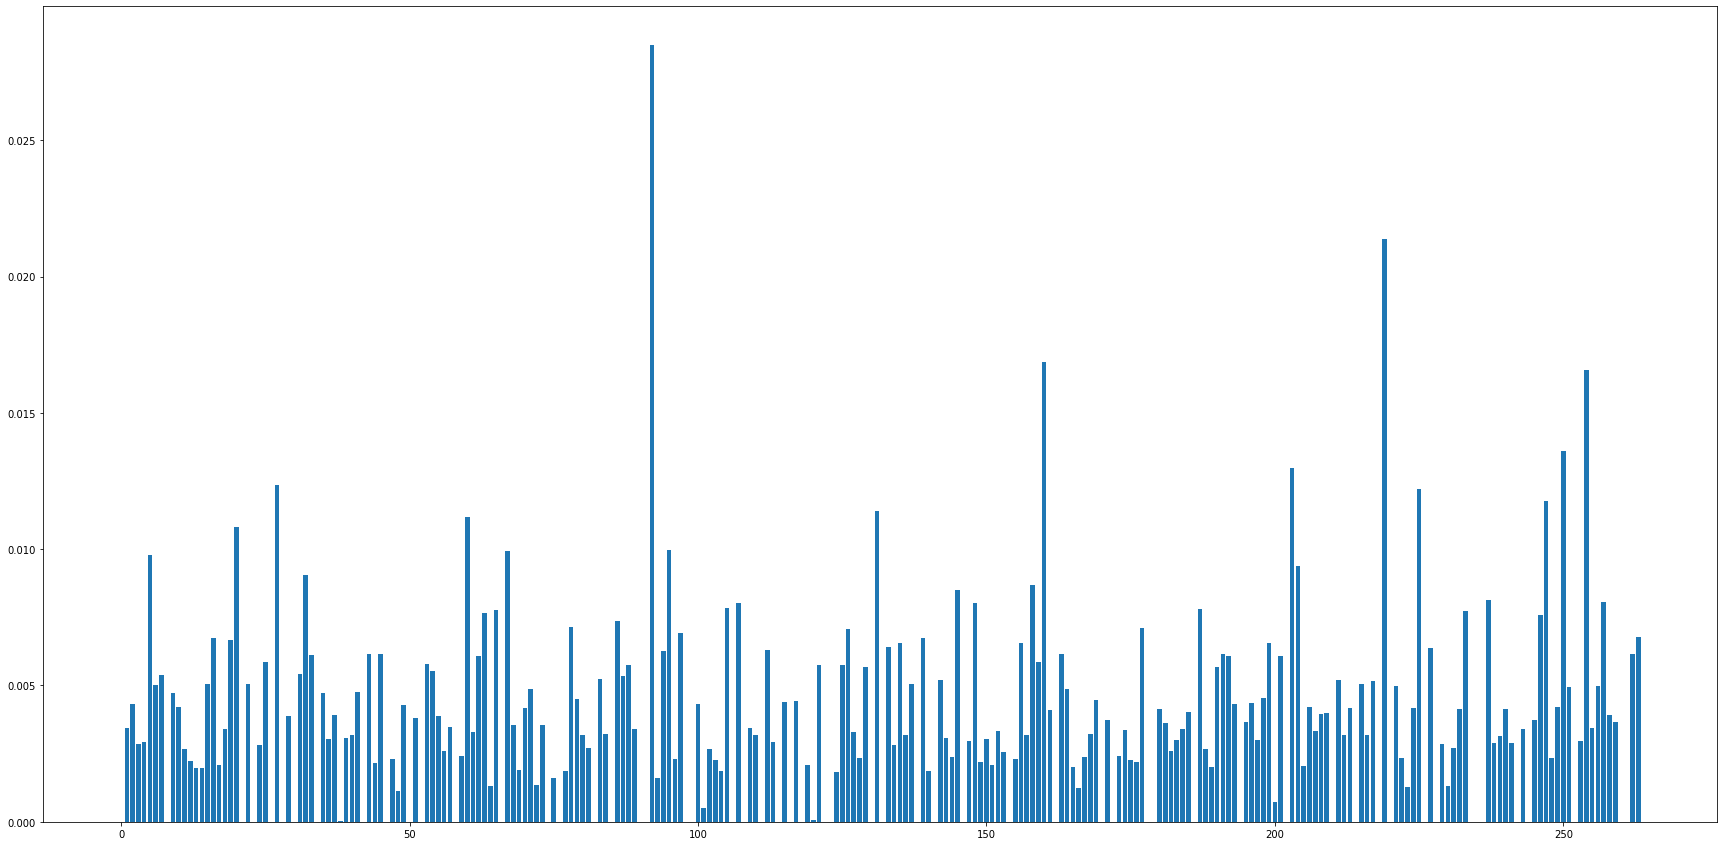

In [ ]:
# plot feature importance manually

from numpy import loadtxt
from xgboost import XGBClassifier
# from matplotlib import pyplot

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]


# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
feat = model.feature_importances_
feat1 = sorted(feat, reverse = True)
print (feat1)

[0.028485158, 0.021372214, 0.01686501, 0.016573135, 0.013602837, 0.012969183, 0.012356852, 0.012222712, 0.011780458, 0.011416535, 0.011190426, 0.010829931, 0.009972231, 0.009933803, 0.009792178, 0.009381751, 0.009054488, 0.00867832, 0.008487698, 0.008128509, 0.008075048, 0.008020416, 0.008008777, 0.0078253355, 0.007819554, 0.007764485, 0.0077496367, 0.0076643117, 0.0075786486, 0.007349358, 0.0071600173, 0.0071224966, 0.007059306, 0.0069102715, 0.006787934, 0.0067515164, 0.0067465515, 0.006667982, 0.00656563, 0.0065505267, 0.006550315, 0.0063961893, 0.0063919188, 0.006289266, 0.00626122, 0.006167496, 0.006144927, 0.006142743, 0.006138834, 0.0061371285, 0.0061221616, 0.006080281, 0.006073321, 0.0060661915, 0.0058702677, 0.005844227, 0.005774538, 0.0057538142, 0.00574809, 0.0057441527, 0.0056675994, 0.005664109, 0.005517385, 0.005408983, 0.005396498, 0.0053429627, 0.0052493685, 0.0052007786, 0.005197783, 0.0051804334, 0.0050676926, 0.005060747, 0.0050537875, 0.005039542, 0.004999586, 0.00

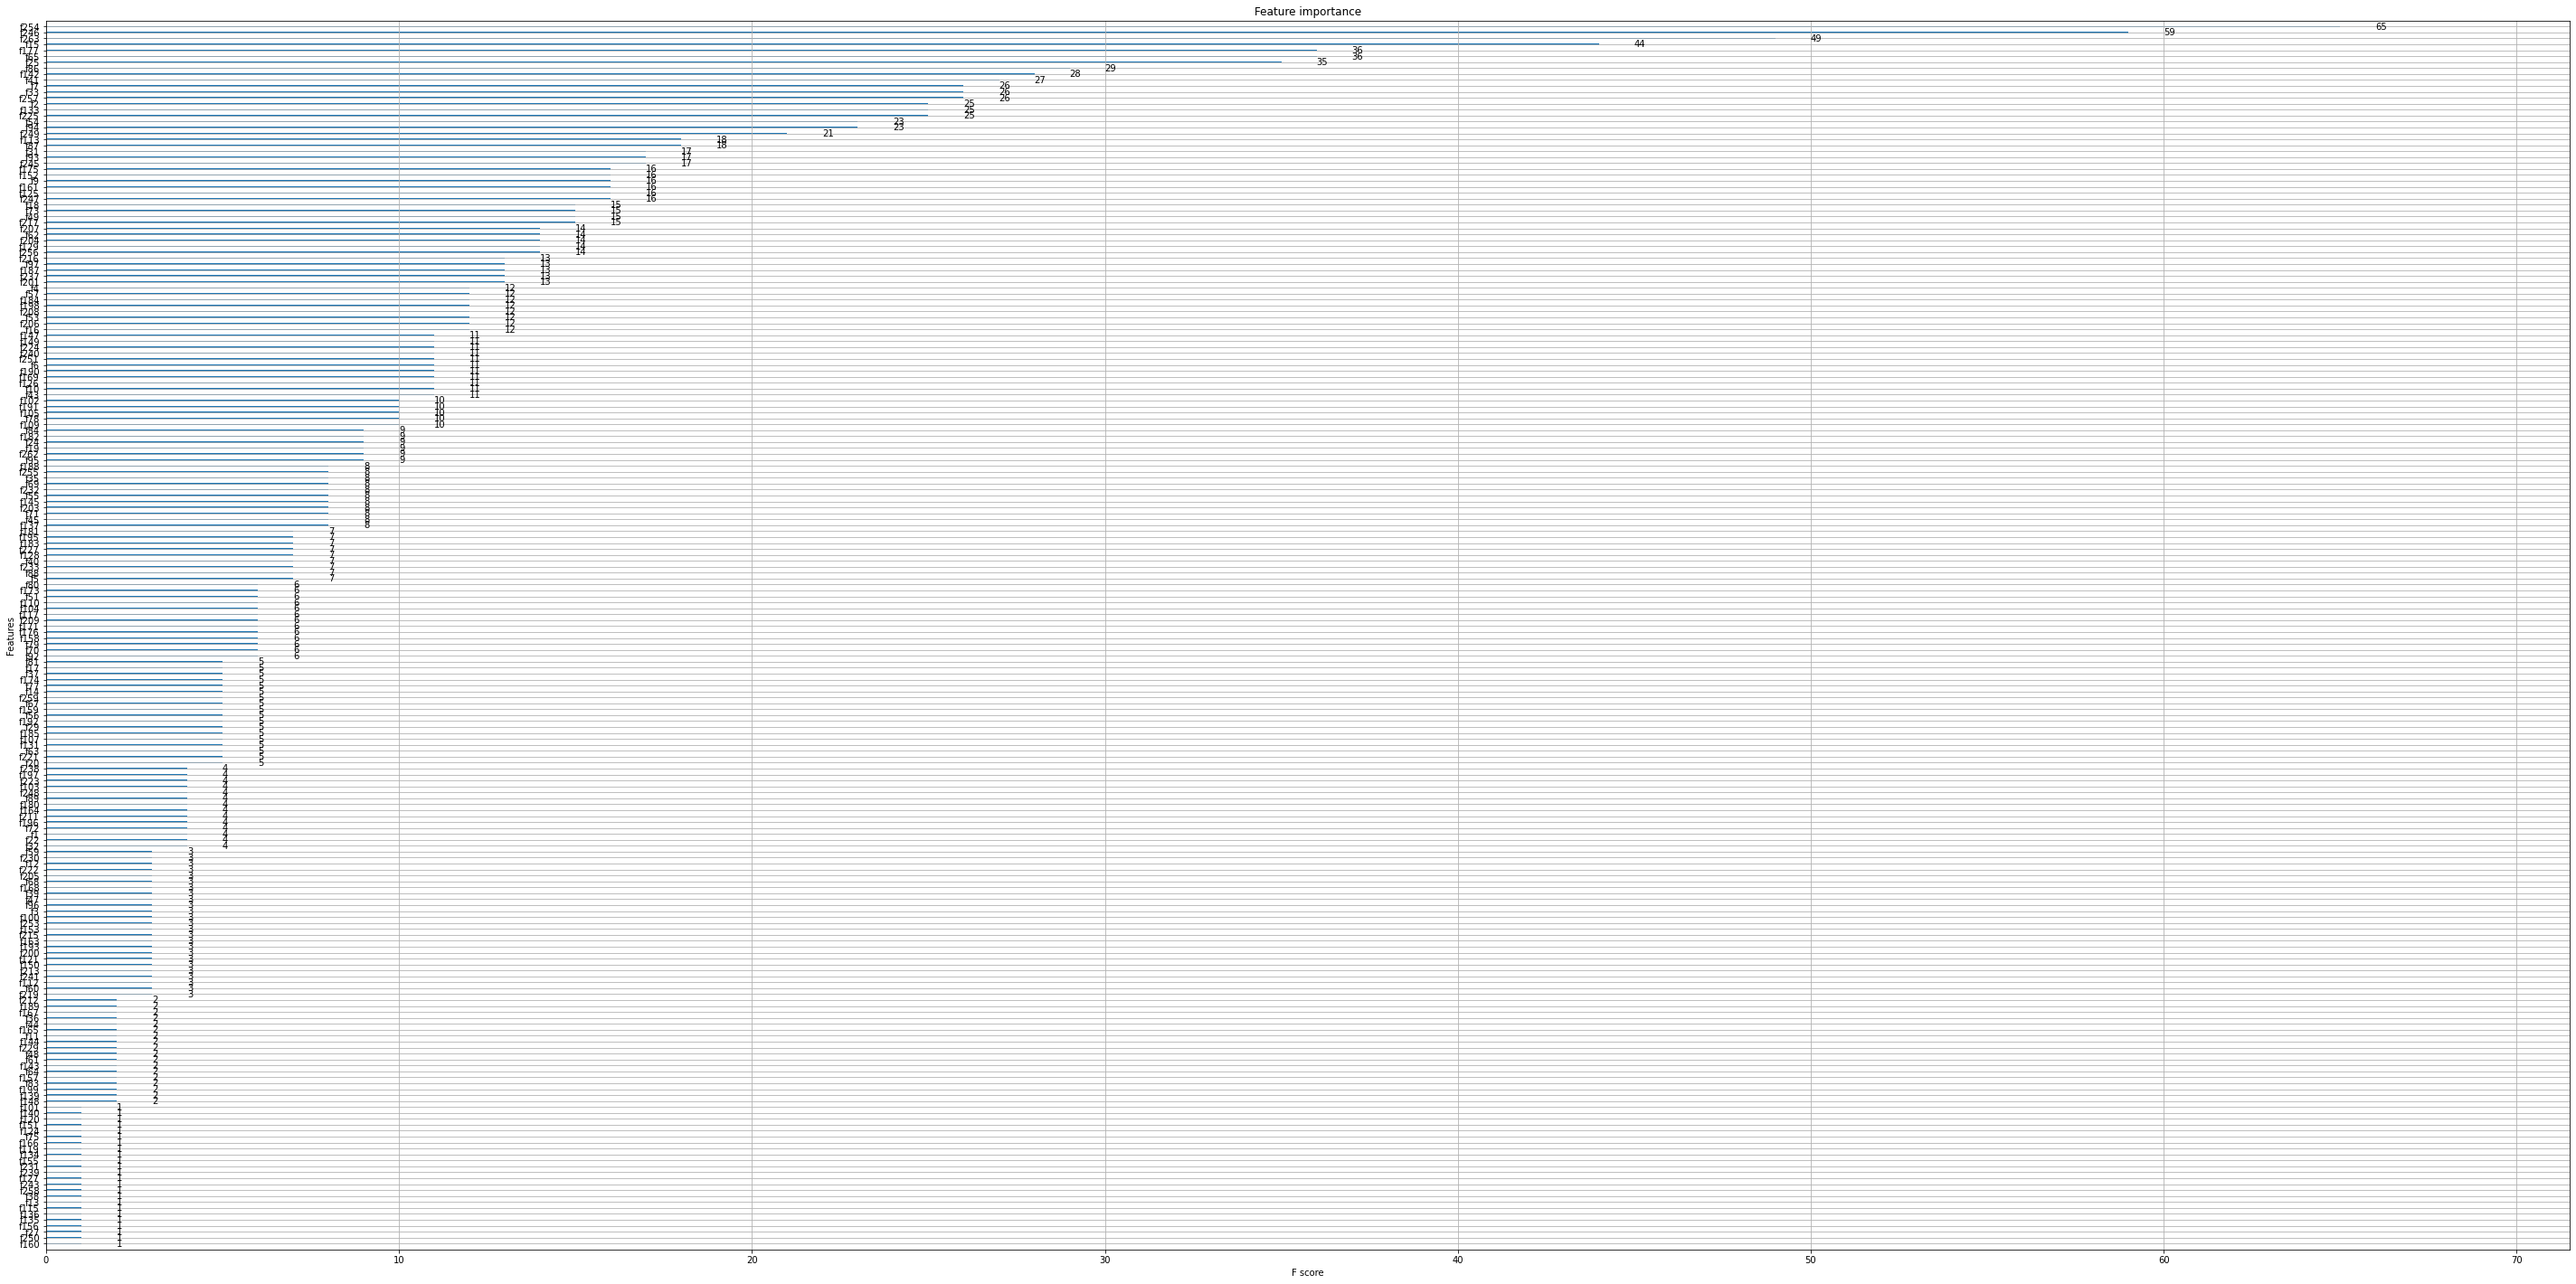

In [ ]:
# plot feature importance using built-in function

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
# from matplotlib import pyplot

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 25]

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()
# feat_num = [2, 29, 21, 150, 12, 136, 108, 135, 132, 9, 116, 125, 131, 85, 7, 16, 118, 11, 140, 6]

In [ ]:
columns = ['Fractal_Dimension','Coeffiecient_of_Variation','Mean_of_Vertex_to_Vertex_Slope','Variance_of_Vertex_to_Vertex_Slope',
         'Hjorth_Activity','Hjorth_Mobility','Hjorth_Complexity',
         'Kurtosis','2nd_Difference_Mean','2nd_Difference_Max',
         'Skewness','1st_Difference_Mean','1st_Difference_Max',
         'FFT_Delta_MaxPower','FFT_Theta_MaxPower','FFT_Alpha_MaxPower','FFT_Beta_MaxPower','Delta/Theta','Delta/Alpha','Theta/Alpha','(Delta+Theta)/Alpha',
         '1_Wavelet_Approximate_Mean','1_Wavelet_Approximate_Std_Deviation','1_Wavelet_Approximate_Energy','1_Wavelet_Detailed_Mean','1_Wavelet_Detailed_Std_Deviation','1_Wavelet_Detailed_Energy','1_Wavelet_Approximate_Entropy','1_Wavelet_Detailed_Entropy',
         '2_Wavelet_Approximate_Mean','2_Wavelet_Approximate_Std_Deviation','2_Wavelet_Approximate_Energy','2_Wavelet_Detailed_Mean','2_Wavelet_Detailed_Std _Deviation','2_Wavelet_Detailed_Energy','2_Wavelet_Approximate_Entropy','2_Wavelet_Detailed_Entropy',
         '3_Wavelet_Approximate_Mean','3_Wavelet_Approximate_Std_Deviation','3_Wavelet_Approximate_Energy','3_Wavelet_Detailed_Mean','3_Wavelet_Detailed_Std _Deviation','3_Wavelet_Detailed_Energy','3_Wavelet_Approximate_Entropy','3_Wavelet_Detailed_Entropy',
         '4_Wavelet_Approximate_Mean','4_Wavelet_Approximate_Std_Deviation','4_Wavelet_Approximate_Energy','4_Wavelet_Detailed_Mean','4_Wavelet_Detailed_Std _Deviation','4_Wavelet_Detailed_Energy','4_Wavelet_Approximate_Entropy','4_Wavelet_Detailed_Entropy',
         '5_Wavelet_Approximate_Mean','5_Wavelet_Approximate_Std_Deviation','5_Wavelet_Approximate_Energy','5_Wavelet_Detailed_Mean','5_Wavelet_Detailed_Std _Deviation','5_Wavelet_Detailed_Energy','5_Wavelet_Approximate_Entropy','5_Wavelet_Detailed_Entropy',
         '6_Wavelet_Approximate_Mean','6_Wavelet_Approximate_Std_Deviation','6_Wavelet_Approximate_Energy','6_Wavelet_Detailed_Mean','6_Wavelet_Detailed_Std _Deviation','6_Wavelet_Detailed_Energy','6_Wavelet_Approximate_Entropy','6_Wavelet_Detailed_Entropy',
         '7_Wavelet_Approximate_Mean','7_Wavelet_Approximate_Std_Deviation','7_Wavelet_Approximate_Energy','7_Wavelet_Detailed_Mean','7_Wavelet_Detailed_Std _Deviation','7_Wavelet_Detailed_Energy','7_Wavelet_Approximate_Entropy','7_Wavelet_Detailed_Entropy',
         '8_Wavelet_Approximate_Mean','8_Wavelet_Approximate_Std_Deviation','8_Wavelet_Approximate_Energy','8_Wavelet_Detailed_Mean','8_Wavelet_Detailed_Std _Deviation','8_Wavelet_Detailed_Energy','8_Wavelet_Approximate_Entropy','8_Wavelet_Detailed_Entropy',
         '9_Wavelet_Approximate_Mean','9_Wavelet_Approximate_Std_Deviation','9_Wavelet_Approximate_Energy','9_Wavelet_Detailed_Mean','9_Wavelet_Detailed_Std _Deviation','9_Wavelet_Detailed_Energy','9_Wavelet_Approximate_Entropy','9_Wavelet_Detailed_Entropy',
         '10_Wavelet_Approximate_Mean','10_Wavelet_Approximate_Std_Deviation','10_Wavelet_Approximate_Energy','10_Wavelet_Detailed_Mean','10_Wavelet_Detailed_Std _Deviation','10_Wavelet_Detailed_Energy','10_Wavelet_Approximate_Entropy','10_Wavelet_Detailed_Entropy',
         '11_Wavelet_Approximate_Mean','11_Wavelet_Approximate_Std_Deviation','11_Wavelet_Approximate_Energy','11_Wavelet_Detailed_Mean','11_Wavelet_Detailed_Std _Deviation','11_Wavelet_Detailed_Energy','11_Wavelet_Approximate_Entropy','11_Wavelet_Detailed_Entropy',
         '12_Wavelet_Approximate_Mean','12_Wavelet_Approximate_Std_Deviation','12_Wavelet_Approximate_Energy','12_Wavelet_Detailed_Mean','12_Wavelet_Detailed_Std _Deviation','12_Wavelet_Detailed_Energy','12_Wavelet_Approximate_Entropy','12_Wavelet_Detailed_Entropy',
         '13_Wavelet_Approximate_Mean','13_Wavelet_Approximate_Std_Deviation','13_Wavelet_Approximate_Energy','13_Wavelet_Detailed_Mean','13_Wavelet_Detailed_Std _Deviation','13_Wavelet_Detailed_Energy','13_Wavelet_Approximate_Entropy','13_Wavelet_Detailed_Entropy',
         '14_Wavelet_Approximate_Mean','14_Wavelet_Approximate_Std_Deviation','14_Wavelet_Approximate_Energy','14_Wavelet_Detailed_Mean','14_Wavelet_Detailed_Std _Deviation','14_Wavelet_Detailed_Energy','14_Wavelet_Approximate_Entropy','14_Wavelet_Detailed_Entropy',
         '15_Wavelet_Approximate_Mean','15_Wavelet_Approximate_Std_Deviation','15_Wavelet_Approximate_Energy','15_Wavelet_Detailed_Mean','15_Wavelet_Detailed_Std _Deviation','15_Wavelet_Detailed_Energy','15_Wavelet_Approximate_Entropy','15_Wavelet_Detailed_Entropy',
         '16_Wavelet_Approximate_Mean','16_Wavelet_Approximate_Std_Deviation','16_Wavelet_Approximate_Energy','16_Wavelet_Detailed_Mean','16_Wavelet_Detailed_Std _Deviation','16_Wavelet_Detailed_Energy','16_Wavelet_Approximate_Entropy','16_Wavelet_Detailed_Entropy',
         '17_Wavelet_Approximate_Mean','17_Wavelet_Approximate_Std_Deviation','17_Wavelet_Approximate_Energy','17_Wavelet_Detailed_Mean','17_Wavelet_Detailed_Std _Deviation','17_Wavelet_Detailed_Energy','17_Wavelet_Approximate_Entropy','17_Wavelet_Detailed_Entropy',
         '18_Wavelet_Approximate_Mean','18_Wavelet_Approximate_Std_Deviation','18_Wavelet_Approximate_Energy','18_Wavelet_Detailed_Mean','18_Wavelet_Detailed_Std _Deviation','18_Wavelet_Detailed_Energy','18_Wavelet_Approximate_Entropy','18_Wavelet_Detailed_Entropy',
         '19_Wavelet_Approximate_Mean','19_Wavelet_Approximate_Std_Deviation','19_Wavelet_Approximate_Energy','19_Wavelet_Detailed_Mean','19_Wavelet_Detailed_Std _Deviation','19_Wavelet_Detailed_Energy','19_Wavelet_Approximate_Entropy','19_Wavelet_Detailed_Entropy',
         '20_Wavelet_Approximate_Mean','20_Wavelet_Approximate_Std_Deviation','20_Wavelet_Approximate_Energy','20_Wavelet_Detailed_Mean','20_Wavelet_Detailed_Std _Deviation','20_Wavelet_Detailed_Energy','20_Wavelet_Approximate_Entropy','20_Wavelet_Detailed_Entropy',
         '21_Wavelet_Approximate_Mean','21_Wavelet_Approximate_Std_Deviation','21_Wavelet_Approximate_Energy','21_Wavelet_Detailed_Mean','21_Wavelet_Detailed_Std _Deviation','21_Wavelet_Detailed_Energy','21_Wavelet_Approximate_Entropy','21_Wavelet_Detailed_Entropy',
         '22_Wavelet_Approximate_Mean','22_Wavelet_Approximate_Std_Deviation','22_Wavelet_Approximate_Energy','22_Wavelet_Detailed_Mean','22_Wavelet_Detailed_Std _Deviation','22_Wavelet_Detailed_Energy','22_Wavelet_Approximate_Entropy','22_Wavelet_Detailed_Entropy',
         '23_Wavelet_Approximate_Mean','23_Wavelet_Approximate_Std_Deviation','23_Wavelet_Approximate_Energy','23_Wavelet_Detailed_Mean','23_Wavelet_Detailed_Std _Deviation','23_Wavelet_Detailed_Energy','23_Wavelet_Approximate_Entropy','23_Wavelet_Detailed_Entropy',
         '24_Wavelet_Approximate_Mean','24_Wavelet_Approximate_Std_Deviation','24_Wavelet_Approximate_Energy','24_Wavelet_Detailed_Mean','24_Wavelet_Detailed_Std _Deviation','24_Wavelet_Detailed_Energy','24_Wavelet_Approximate_Entropy','24_Wavelet_Detailed_Entropy',
         '25_Wavelet_Approximate_Mean','25_Wavelet_Approximate_Std_Deviation','25_Wavelet_Approximate_Energy','25_Wavelet_Detailed_Mean','25_Wavelet_Detailed_Std _Deviation','25_Wavelet_Detailed_Energy','25_Wavelet_Approximate_Entropy','25_Wavelet_Detailed_Entropy',
         '26_Wavelet_Approximate_Mean','26_Wavelet_Approximate_Std_Deviation','26_Wavelet_Approximate_Energy','26_Wavelet_Detailed_Mean','26_Wavelet_Detailed_Std _Deviation','26_Wavelet_Detailed_Energy','26_Wavelet_Approximate_Entropy','26_Wavelet_Detailed_Entropy',
         '27_Wavelet_Approximate_Mean','27_Wavelet_Approximate_Std_Deviation','27_Wavelet_Approximate_Energy','27_Wavelet_Detailed_Mean','27_Wavelet_Detailed_Std _Deviation','27_Wavelet_Detailed_Energy','27_Wavelet_Approximate_Entropy','27_Wavelet_Detailed_Entropy',
         '28_Wavelet_Approximate_Mean','28_Wavelet_Approximate_Std_Deviation','28_Wavelet_Approximate_Energy','28_Wavelet_Detailed_Mean','28_Wavelet_Detailed_Std _Deviation','28_Wavelet_Detailed_Energy','28_Wavelet_Approximate_Entropy','28_Wavelet_Detailed_Entropy',
         '29_Wavelet_Approximate_Mean','29_Wavelet_Approximate_Std_Deviation','29_Wavelet_Approximate_Energy','29_Wavelet_Detailed_Mean','29_Wavelet_Detailed_Std _Deviation','29_Wavelet_Detailed_Energy','29_Wavelet_Approximate_Entropy','29_Wavelet_Detailed_Entropy',
         '30_Wavelet_Approximate_Mean','30_Wavelet_Approximate_Std_Deviation','30_Wavelet_Approximate_Energy','30_Wavelet_Detailed_Mean','30_Wavelet_Detailed_Std _Deviation','30_Wavelet_Detailed_Energy','30_Wavelet_Approximate_Entropy','30_Wavelet_Detailed_Entropy',
         'Shannon_Entropy', 'Hurst_Exponent', 'Permutation_Entropy']
        #  ,'detrended fluctuation analysis (DFA)']

In [ ]:
feat_num = [254, 246, 263, 15, 177, 65, 25, 86, 142, 41, 7, 33, 257, 2, 133, 225, 54, 94, 249, 113]
for  i in feat_num:
    print(columns[i])
# print (columns[2])

30_Wavelet_Approximate_Std_Deviation
29_Wavelet_Approximate_Std_Deviation
Permutation_Entropy
FFT_Alpha_MaxPower
20_Wavelet_Detailed_Std _Deviation
6_Wavelet_Detailed_Std _Deviation
1_Wavelet_Detailed_Std_Deviation
9_Wavelet_Approximate_Std_Deviation
16_Wavelet_Approximate_Std_Deviation
3_Wavelet_Detailed_Std _Deviation
Kurtosis
2_Wavelet_Detailed_Std _Deviation
30_Wavelet_Detailed_Std _Deviation
Mean_of_Vertex_to_Vertex_Slope
15_Wavelet_Approximate_Mean
26_Wavelet_Detailed_Std _Deviation
5_Wavelet_Approximate_Std_Deviation
10_Wavelet_Approximate_Std_Deviation
29_Wavelet_Detailed_Std _Deviation
12_Wavelet_Detailed_Std _Deviation


In [ ]:

# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


model = XGBClassifier(max_depth = 3,n_estimators=5)
model.fit(x_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
# print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=columns)
# feat_importances.nlargest(50).plot(kind='barh')
# plt.show()

thresholds = sorted(model.feature_importances_, reverse = True)


for thresh in thresholds[:20]:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 50.70423%
Thresh=0.083, n=1, Accuracy: 42.25%
Thresh=0.046, n=2, Accuracy: 45.77%
Thresh=0.042, n=3, Accuracy: 46.48%
Thresh=0.042, n=4, Accuracy: 47.18%
Thresh=0.041, n=5, Accuracy: 48.59%
Thresh=0.033, n=6, Accuracy: 52.82%
Thresh=0.031, n=7, Accuracy: 51.41%
Thresh=0.029, n=8, Accuracy: 52.11%
Thresh=0.029, n=9, Accuracy: 54.93%
Thresh=0.027, n=10, Accuracy: 54.23%
Thresh=0.027, n=11, Accuracy: 54.93%
Thresh=0.027, n=12, Accuracy: 55.63%
Thresh=0.027, n=13, Accuracy: 59.86%
Thresh=0.023, n=14, Accuracy: 59.15%
Thresh=0.022, n=15, Accuracy: 57.75%
Thresh=0.022, n=16, Accuracy: 57.04%
Thresh=0.021, n=17, Accuracy: 57.04%
Thresh=0.021, n=18, Accuracy: 59.15%
Thresh=0.021, n=19, Accuracy: 57.04%
Thresh=0.020, n=20, Accuracy: 59.86%


In [ ]:
#2 - XGBoost Classifier
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# start = time.time()

model = XGBClassifier(max_depth = 3, n_estimators = 5)
model.fit(x_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))
# end= time.time()
# print("Time taken=", end-start)
print (confusion_matrix(y_test, y_pred))
     

Accuracy: 50.70423%
[[27 16 12]
 [ 7 28 10]
 [ 9 16 17]]


In [ ]:
feat_importances.sort_values(ascending =False).head(50)

30_Wavelet_Approximate_Std_Deviation    0.082845
11_Wavelet_Detailed_Std _Deviation      0.045806
Permutation_Entropy                     0.042368
Kurtosis                                0.042236
11_Wavelet_Approximate_Entropy          0.041076
9_Wavelet_Detailed_Entropy              0.032947
26_Wavelet_Detailed_Std _Deviation      0.031496
FFT_Beta_MaxPower                       0.029084
29_Wavelet_Approximate_Std_Deviation    0.029080
8_Wavelet_Detailed_Std _Deviation       0.027419
30_Wavelet_Detailed_Std _Deviation      0.027405
29_Wavelet_Detailed_Std _Deviation      0.026547
10_Wavelet_Approximate_Std_Deviation    0.026504
3_Wavelet_Detailed_Std _Deviation       0.022838
9_Wavelet_Approximate_Energy            0.021740
26_Wavelet_Approximate_Mean             0.021593
18_Wavelet_Approximate_Mean             0.020901
14_Wavelet_Approximate_Mean             0.020869
23_Wavelet_Approximate_Mean             0.020765
6_Wavelet_Detailed_Std _Deviation       0.020019
5_Wavelet_Approximat

In [ ]:
#3-SVM
print('#3-SVM')
def evaluate_on_test_data(model=None):
    predictions = model.predict(x_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

kernels = ('poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    # start =time.time()
    model = svm.SVC(kernel=kernel, C = .1)
    model.fit(x_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("Accuracy with {} kernel = {}".format(kernel,acc))
    # end=time.time()
    # print("Time taken=",end-start)
     

#3-SVM
Accuracy with poly kernel = 34.50704225352113
Accuracy with rbf kernel = 31.690140845070424


In [ ]:

print('#4-MLP')
# start=time.time()
model = MLPClassifier(hidden_layer_sizes=(3,3,3,5), random_state=1, alpha = .1)
# model.fit(X_train, y_train)
model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
# end=time.time()
# print("Time taken=",end-start)
print (confusion_matrix(y_test, y_test_pred))
# print (y,y_pred)

#4-MLP
0.5352112676056338
[[31 14 10]
 [ 8 18 19]
 [ 3 12 27]]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.56      0.64        55
         2.0       0.41      0.40      0.40        45
         3.0       0.48      0.64      0.55        42

    accuracy                           0.54       142
   macro avg       0.54      0.54      0.53       142
weighted avg       0.56      0.54      0.54       142



In [ ]:
from sklearn.metrics import roc_curve, auc
     

#5-DecisionTree
print('#5-DecisionTree')
# start=time.time()
model = tree.DecisionTreeClassifier(max_depth = 4)
# model.fit(X_train, y_train)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)
# end=time.time()
# print("Time taken=",end-start)

#5-DecisionTree


0.47183098591549294

[0.         0.0031588  0.00381536 0.00421359 0.00822616 0.00450123
 0.00374675 0.00619447 0.00337039 0.00489679 0.00337701 0.00502671
 0.0042596  0.00209323 0.00431012 0.00420105 0.00310231 0.00401122
 0.00297993 0.00296022 0.00366685 0.00389801 0.00330246 0.00320159
 0.00253696 0.00539674 0.00416617 0.00471541 0.00293747 0.00364373
 0.00381717 0.00343836 0.00400728 0.00368705 0.00412961 0.00391882
 0.00254381 0.00301586 0.00346335 0.00256673 0.00324405 0.00584877
 0.00435285 0.00425516 0.00296843 0.00294805 0.00347805 0.00238817
 0.00251061 0.00294278 0.00310003 0.00335862 0.00225274 0.00441151
 0.0040061  0.00357279 0.00359258 0.00328193 0.00303109 0.00344762
 0.00351401 0.00348771 0.00357925 0.00377843 0.00287784 0.00436548
 0.00592816 0.00491699 0.0032293  0.00385957 0.00444756 0.00355115
 0.00262392 0.00623173 0.00456072 0.00468294 0.00340713 0.00331238
 0.00326136 0.00301466 0.00310239 0.00564639 0.00383597 0.00424098
 0.00280013 0.00407593 0.00474106 0.00544575 0.00302836 0.0035

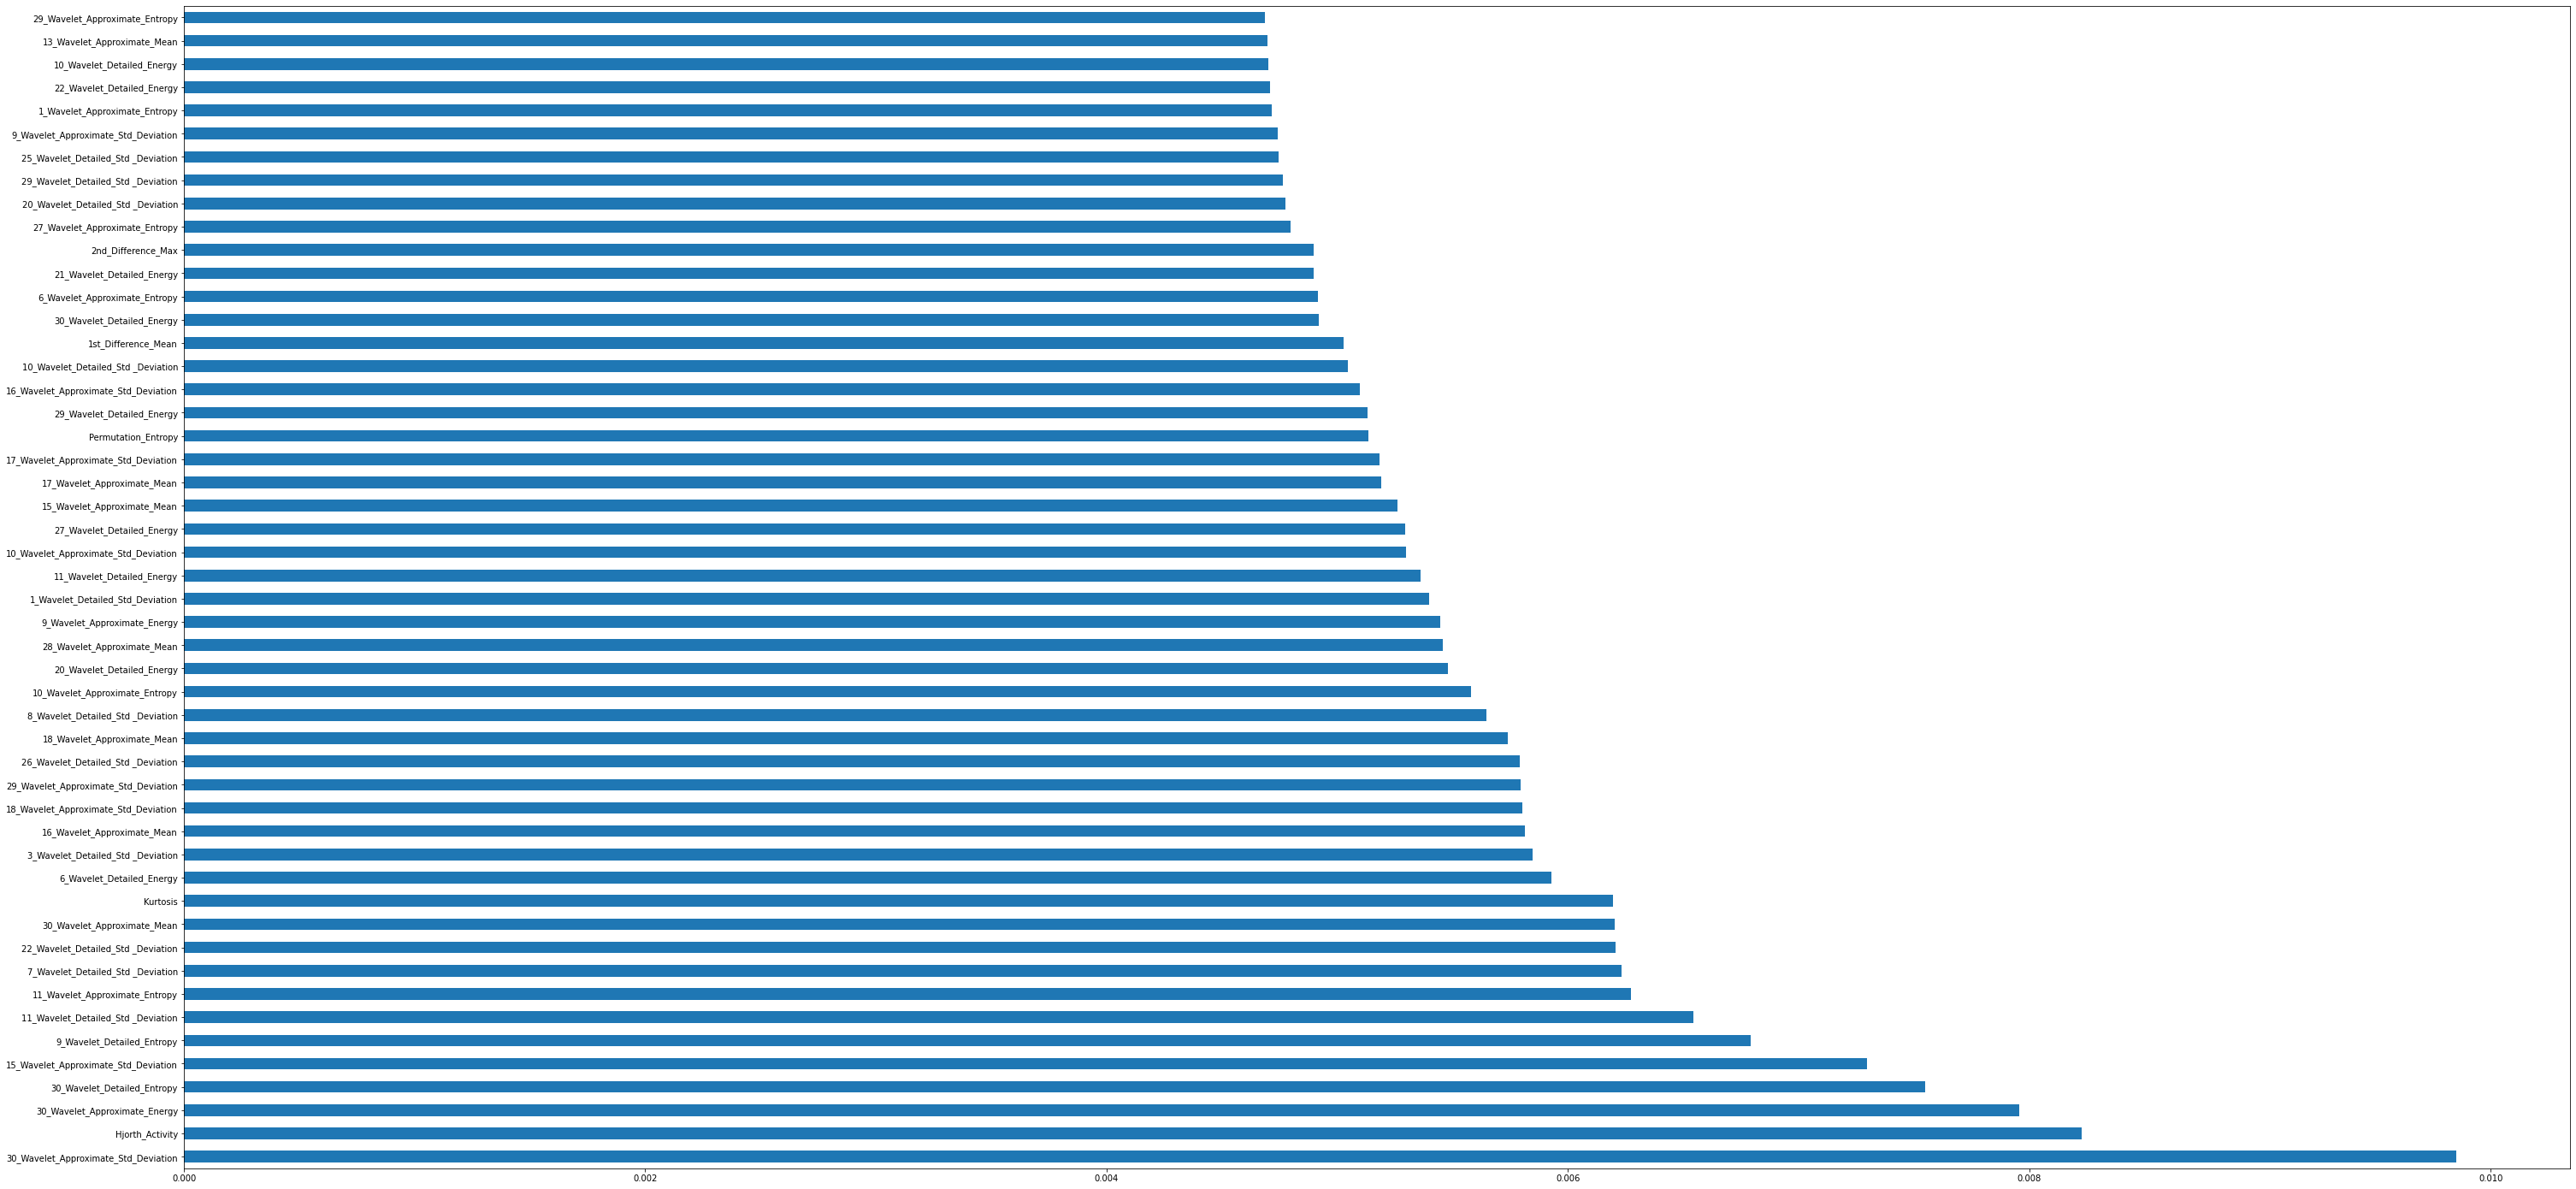

In [ ]:
import pandas as pd
import numpy as np
import random


# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
random.seed(5)   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x_train,y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
y_test_pred = model.predict(x_test)
print (metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None))
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [ ]:
feat_importances.sort_values(ascending =False).head(50)
# feat_importances1 = sorted(feat_importances, reverse = True)
# feat_importances1

30_Wavelet_Approximate_Std_Deviation    0.009852
Hjorth_Activity                         0.008226
30_Wavelet_Approximate_Energy           0.007956
30_Wavelet_Detailed_Entropy             0.007550
15_Wavelet_Approximate_Std_Deviation    0.007298
9_Wavelet_Detailed_Entropy              0.006793
11_Wavelet_Detailed_Std _Deviation      0.006546
11_Wavelet_Approximate_Entropy          0.006273
7_Wavelet_Detailed_Std _Deviation       0.006232
22_Wavelet_Detailed_Std _Deviation      0.006205
30_Wavelet_Approximate_Mean             0.006201
Kurtosis                                0.006194
6_Wavelet_Detailed_Energy               0.005928
3_Wavelet_Detailed_Std _Deviation       0.005849
16_Wavelet_Approximate_Mean             0.005814
18_Wavelet_Approximate_Std_Deviation    0.005802
29_Wavelet_Approximate_Std_Deviation    0.005797
26_Wavelet_Detailed_Std _Deviation      0.005790
18_Wavelet_Approximate_Mean             0.005738
8_Wavelet_Detailed_Std _Deviation       0.005646
10_Wavelet_Approxima

**Classification**

In [ ]:
from sklearn import metrics
#1 random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state = 42)
# Train the classifier
clf.fit(x_train, y_train)
RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=42)
y_test_pred=clf.predict(x_test)
clf.score(x_test, y_test)
# 0.877568493150685


0.6267605633802817

In [ ]:
metrics.accuracy_score(y_test,y_test_pred, normalize = True, sample_weight = None)
# 0.877568493150685


0.6267605633802817

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[34, 12,  9],
       [ 8, 30,  7],
       [ 7, 10, 25]])

In [ ]:
#2 Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
# DecisionTreeClassifier()
y_test_pred=clf.predict(x_test)
clf.score(x_test,y_test)
# 0.7611301369863014
metrics.accuracy_score(y_test,y_test_pred, normalize = True, sample_weight = None)

0.5211267605633803

In [ ]:
#3 KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(x_train, y_train)
# KNeighborsClassifier(n_neighbors=6)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)

0.528169014084507

In [ ]:
#4 SVM
from sklearn import datasets, svm
def evaluate_on_test_data(model=None):
    predictions = model.predict(x_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

kernels = ('rbf','linear','poly')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(x_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("Accuracy with {} kernel = {}".format(kernel,acc))

Accuracy with rbf kernel = 58.45070422535211
Accuracy with linear kernel = 64.78873239436619
Accuracy with poly kernel = 38.732394366197184


In [ ]:
#5 MLP
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(25,), random_state=1)
model.fit(x_train, y_train)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6408450704225352

In [ ]:
#6 LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None) #shrinkage='auto'
model.fit(x_train, y_train)
# LinearDiscriminantAnalysis(solver='lsqr')
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)

0.528169014084507

In [ ]:
#7 Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 500)
clf.fit(x_train, y_train)
# LogisticRegression(max_iter=500)
y_test_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred, normalize=True, sample_weight=None)

0.6408450704225352